<a href="https://colab.research.google.com/github/nishant-harinkhede12/Advanced-M-C-projects/blob/main/NLP_EDA_MultinominalNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/India_budget_2021.csv'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(url)
data.head()

,Department /Ministry,Fund allotted(in ₹crores)
0,MINISTRY OF AGRICULTURE,131531.19
1,DEPARTMENT OF ATOMIC ENERGY,18264.89
2,"MINISTRY OF AYURVEDA, YOGA",2970.30
3,MINISTRY OF CHEMICALS AND FERTILISER,80714.94
4,MINISTRY OF CIVIL AVIATION,3224.67


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Department /Ministry       56 non-null     object 
 1   Fund allotted(in ₹crores)  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In this step, (i) Grand total as a row is being deleted, (ii) NA values are being dropped and (iii) Fund allotted(in ₹crores) is converted into intiger data type

In [3]:
data = data[data['Department /Ministry']!='GRAND TOTAL']
data.isnull().sum()
data.dropna(inplace=True)
data["Fund allotted(in ₹crores)"] = data["Fund allotted(in ₹crores)"].astype('int')


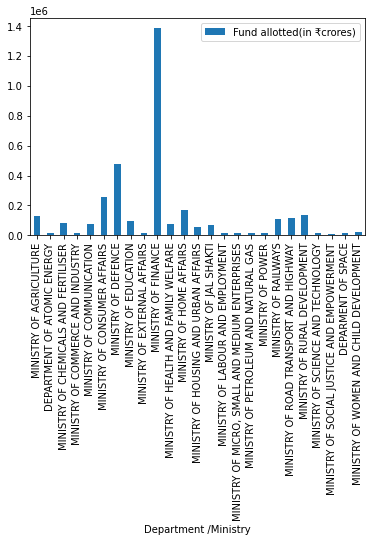

In [4]:
data1 = data[data['Fund allotted(in ₹crores)']>=10000]
data1.plot.bar(x='Department /Ministry', y='Fund allotted(in ₹crores)')

In [5]:
data1 =pd.DataFrame(data1)

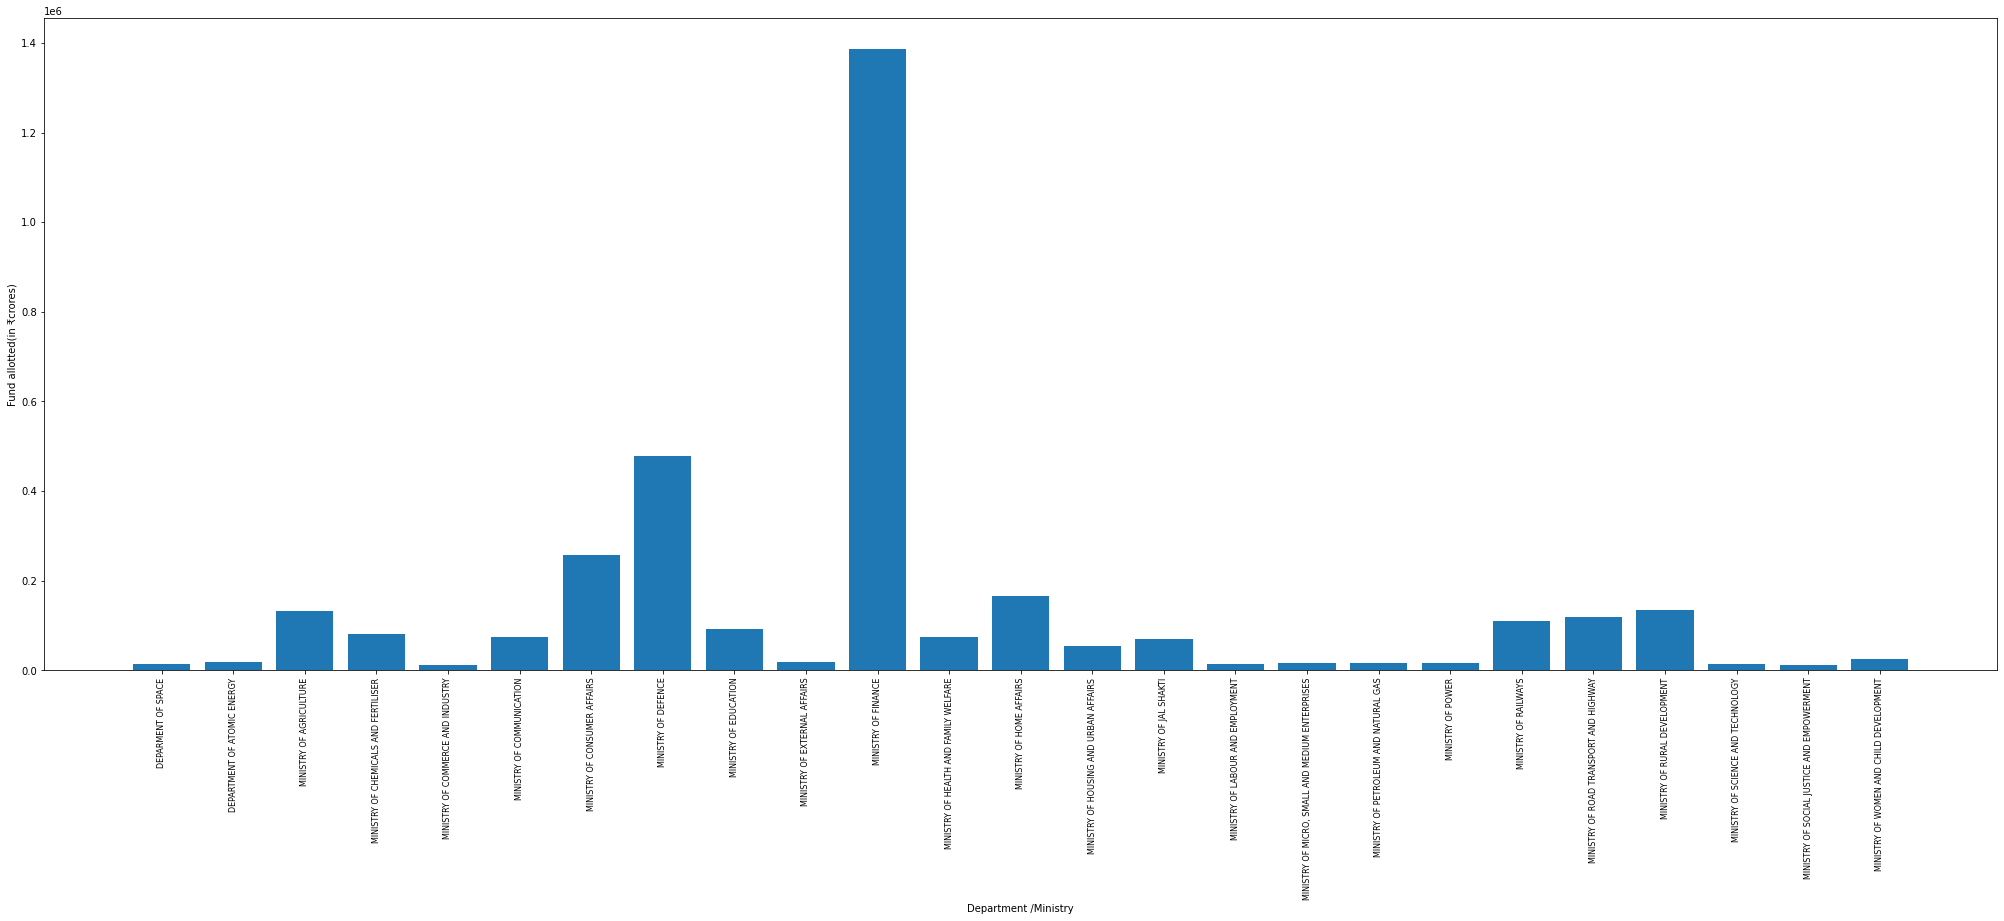

In [7]:
data2 = data1.groupby('Department /Ministry').sum()
plt.figure(figsize=(35,12))
dept = [dept for dept, df in data2.groupby('Department /Ministry')]
plt.bar(dept,data2['Fund allotted(in ₹crores)'])
plt.xticks(dept, rotation = 'vertical', size = 8)
plt.ylabel('Fund allotted(in ₹crores)')
plt.xlabel('Department /Ministry')
plt.show()

In [8]:
data['Department /Ministry'].value_counts()

MINISTRY OF INFORMATION AND BROADCASTING                      1
MINISTRY OF STATISTICS                                        1
MINISTRY OF FOOD PROCESSING INDUSTRIES                        1
MINISTRY OF MINES                                             1
MINISTRY OF SCIENCE AND TECHNOLOGY                            1
MINISTRY OF SOCIAL JUSTICE AND EMPOWERMENT                    1
MINISTRY OF SKILL DEVELOPMENT                                 1
MINISTRY OF EDUCATION                                         1
MINISTRY OF NEW AND RENEWABLE ENERGY                          1
MINISTRY OF ENVIRONMENT, FOREST                               1
DEPARTMENT OF ATOMIC ENERGY                                   1
MINISTRY OF HEAVY INDUSTRIES                                  1
MINISTRY OF LAW AND JUSTICE                                   1
MINISTRY OF TRIBAL AFFAIRS                                    1
MINISTRY OF AYURVEDA, YOGA                                    1
THE PRESIDENT, PARLIAMENT, UNION PUBLIC 

In [9]:
data1.head()

,Department /Ministry,Fund allotted(in ₹crores)
0,MINISTRY OF AGRICULTURE,131531
1,DEPARTMENT OF ATOMIC ENERGY,18264
3,MINISTRY OF CHEMICALS AND FERTILISER,80714
6,MINISTRY OF COMMERCE AND INDUSTRY,12768
7,MINISTRY OF COMMUNICATION,75265


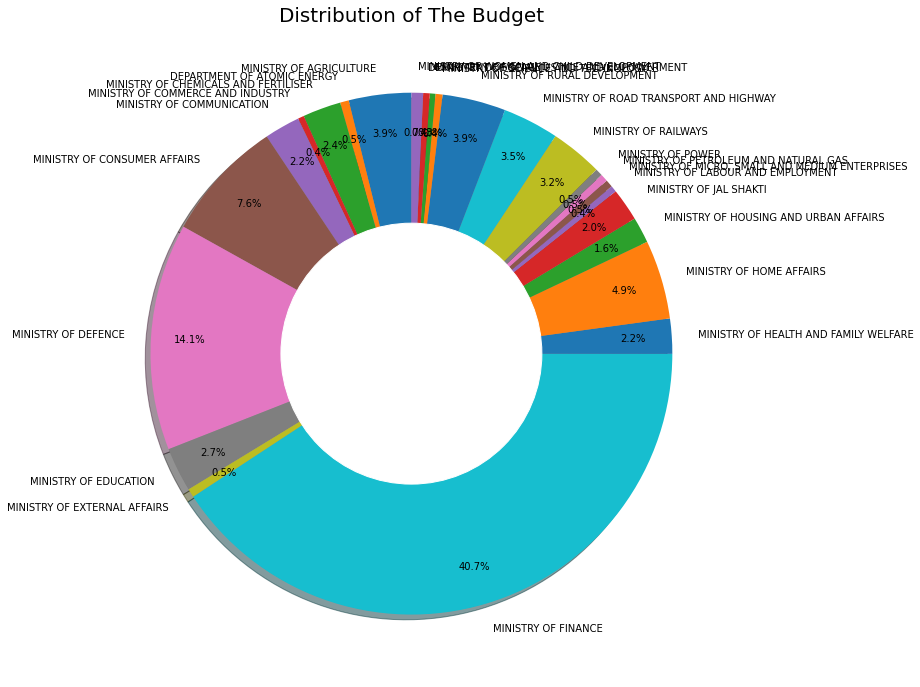

In [10]:
df = data1["Fund allotted(in ₹crores)"]
labels = data1["Department /Ministry"]
plt.figure(figsize=(35,12))
plt.pie(df, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow =True)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of The Budget", fontsize=20)
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

a = np.array(data["Department /Ministry"])

b = np.array(data["Fund allotted(in ₹crores)"])
b = b.reshape(-1, 1)

cv = CountVectorizer()
X = cv.fit_transform(a) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, b, test_size=0.33, random_state=42)

clf = MultinomialNB()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))
# DEPARTMENT OF ATOMIC ENERGY	18264.89

Enter a message:DEPARTMENT OF ATOMIC ENERGY
[18264]


In [14]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))
# Buy one get one free

Enter a message:Buy one get one free
[712]


In [15]:
# MINISTRY OF AYURVEDA, YOGA
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a message:MINISTRY OF AYURVEDA, YOGA
[2970]
